# 调用高德Web服务API文档中所有功能

In [20]:
import pandas as pd
import requests
key ="a46d66d89629ca9fc036964bcedf5d98"

## 地理编码

In [28]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
桂华 = geocode('广东省佛山市南海区桂华中学')
桂华

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省佛山市南海区桂华中学',
   'country': '中国',
   'province': '广东省',
   'citycode': '0757',
   'city': '佛山市',
   'district': '南海区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440605',
   'street': [],
   'number': [],
   'location': '113.150648,23.022201',
   'level': '兴趣点'}]}

In [23]:
df_桂华地理编码 = pd.json_normalize(桂华['geocodes'])
display(df_桂华地理编码)
桂华地理编码 = 桂华['geocodes'][0]['location']
print("桂华地理编码:",桂华地理编码)

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省佛山市南海区桂华中学,中国,广东省,0757,佛山市,南海区,[],440605,[],[],"113.150648,23.022201",兴趣点,[],[],[],[]


桂华地理编码: 113.150648,23.022201


## 逆地理编码

In [19]:
def regeocode(location,poitype=None,radius=None,extensions="all",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

桂华逆地理编码_all = regeocode(桂华地理编码)
print(桂华逆地理编码_all)
df_桂华逆地理编码 = pd.json_normalize(桂华逆地理编码_all).T
display(df_桂华逆地理编码)

{'status': '1', 'regeocode': {'roads': [{'id': '0757F49F012042606147', 'location': '113.151,23.0228', 'direction': '南', 'name': '桂华街', 'distance': '61.8612'}, {'id': '0757F49F012042408', 'location': '113.152,23.0214', 'direction': '西北', 'name': '长堤东路', 'distance': '133.43'}, {'id': '0757F49F01204223417', 'location': '113.149,23.0217', 'direction': '东', 'name': '育才路', 'distance': '157.426'}], 'roadinters': [{'second_name': '育才二路', 'first_id': '0757F49F012042408', 'second_id': '0757F49F012042849', 'location': '113.1521822,23.02186', 'distance': '161.529', 'first_name': '长堤东路', 'direction': '西'}], 'formatted_address': '广东省佛山市南海区桂城街道桂华街桂华中学', 'addressComponent': {'city': '佛山市', 'province': '广东省', 'adcode': '440605', 'district': '南海区', 'towncode': '440605011000', 'streetNumber': {'number': '2号', 'location': '113.150173,23.0216061', 'direction': '西南', 'distance': '82.1031', 'street': '桂华街'}, 'country': '中国', 'township': '桂城街道', 'businessAreas': [{'location': '113.158203,23.036013', 'name': '

,0
status,1
info,OK
infocode,10000
regeocode.roads,"[{'id': '0757F49F012042606147', 'location': '1..."
regeocode.roadinters,"[{'second_name': '育才二路', 'first_id': '0757F49F..."
regeocode.formatted_address,广东省佛山市南海区桂城街道桂华街桂华中学
regeocode.addressComponent.city,佛山市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440605
regeocode.addressComponent.district,南海区


In [20]:
桂华逆地理编码_base = regeocode(桂华地理编码,extensions="base")
print(桂华逆地理编码_base)
df_桂华逆地理编码_base = pd.json_normalize(桂华逆地理编码_base).T
display(df_桂华逆地理编码_base)

{'status': '1', 'regeocode': {'addressComponent': {'city': '佛山市', 'province': '广东省', 'adcode': '440605', 'district': '南海区', 'towncode': '440605011000', 'streetNumber': {'number': '2号', 'location': '113.150173,23.0216061', 'direction': '西南', 'distance': '82.1031', 'street': '桂华街'}, 'country': '中国', 'township': '桂城街道', 'businessAreas': [{'location': '113.158203,23.036013', 'name': '桂城', 'id': '440605'}, {'location': '113.156882,23.007898', 'name': '石啃', 'id': '440605'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0757'}, 'formatted_address': '广东省佛山市南海区桂城街道桂华街桂华中学'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,佛山市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440605
regeocode.addressComponent.district,南海区
regeocode.addressComponent.towncode,440605011000
regeocode.addressComponent.streetNumber.number,2号
regeocode.addressComponent.streetNumber.location,"113.150173,23.0216061"


### 思考

* 地理编码：将详细的结构化地址转换为高德经纬度坐标；逆地理编码：将经纬度转换为详细结构化的地址。这个有效的地址是独一无二的，是由大区域名称到小区域名称组合在一起的字符，我认为这样的数据较准确，能够精准定位。当我们输入一个地址，机器自己能够识别，并且返回这些经纬度数据，所以我认为它是含有ML、AI的功能的。

## 步行路径规划

In [28]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
万科 = geocode('广东省佛山南海区万科广场')
万科_location = 万科['geocodes'][0]['location']
桂华_location = 桂华['geocodes'][0]['location']
print("(起点)桂华_location:",桂华_location,"(终点)万科_location:",万科_location)

(起点)桂华_location: 113.150648,23.022201 (终点)万科_location: 113.153755,23.036377


In [22]:
桂华_万科 = walking(桂华_location,万科_location)
df_步行路径规划 = pd.json_normalize(桂华_万科["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向北步行47米右转,北,[],47,38,"113.150677,23.022326;113.150638,23.022635;113....",右转,[],0
1,沿桂华街向东步行151米左转,东,桂华街,151,121,"113.150616,23.022756;113.150929,23.022786;113....",左转,[],0
2,沿育才二路向北步行137米右转,北,育才二路,137,110,"113.152088,23.022895;113.151988,23.024128",右转,[],0
3,沿南新一路向东步行250米左转,东,南新一路,250,200,"113.151984,23.024128;113.152378,23.024154;113....",左转,[],0
4,沿长堤路向北步行981米右转,北,长堤路,981,785,"113.154453,23.024284;113.154744,23.024931;113....",右转,[],0
5,步行28米左转,[],[],28,22,"113.155195,23.033103;113.155395,23.033286",左转,[],1
6,沿桂澜中路向北步行17米向左前方行走,北,桂澜中路,17,14,"113.155395,23.033286;113.155391,23.033442",向左前方行走,[],0
7,步行27米右转,[],[],27,22,"113.155386,23.033442;113.155221,23.033633",右转,[],1
8,沿南桂东路步行73米向左前方行走,[],南桂东路,73,58,"113.155208,23.033633;113.155247,23.033676;113....",向左前方行走,[],0
9,沿桂澜中路向北步行60米向左前方行走,北,桂澜中路,60,48,"113.155399,23.034262;113.155408,23.034653;113....",向左前方行走,[],0


0              向北步行47米右转
1         沿桂华街向东步行151米左转
2        沿育才二路向北步行137米右转
3        沿南新一路向东步行250米左转
4         沿长堤路向北步行981米右转
5                步行28米左转
6     沿桂澜中路向北步行17米向左前方行走
7                步行27米右转
8       沿南桂东路步行73米向左前方行走
9     沿桂澜中路向北步行60米向左前方行走
10    沿桂澜中路向北步行34米向左前方行走
11              步行146米左转
12               步行27米右转
13            步行49米到达目的地
Name: instruction, dtype: object

### 思考

* 路径规划通过各算法实现功能，类似于我们人类大脑的规划方式，此为“智能”，所以我认为它是含有ML、AI的功能的。

## 行政区域查询

In [51]:
def district(keywords:str):
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()["districts"][0]['districts']
    print("----"+keywords+"有以下的行政区域----")
    for i in data:
        print(i["name"])
    return

In [53]:
district('湖北')

----湖北有以下的行政区域----
武汉市
孝感市
黄冈市
荆门市
十堰市
宜昌市
天门市
襄阳市
仙桃市
潜江市
荆州市
随州市
恩施土家族苗族自治州
咸宁市
神农架林区
鄂州市
黄石市


**湖北省共有17个一级行政区域**

In [35]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:    # base:不返回行政区边界坐标点
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='湖北',extensions='all',subdistrict=2)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_武汉市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_武汉市)

,citycode,adcode,name,center,level,districts
0,027,420100,武汉市,"114.298572,30.584355",city,"[{'citycode': '027', 'adcode': '420117', 'name..."
1,0712,420900,孝感市,"113.926655,30.926423",city,"[{'citycode': '0712', 'adcode': '420982', 'nam..."
2,0713,421100,黄冈市,"114.879365,30.447711",city,"[{'citycode': '0713', 'adcode': '421181', 'nam..."
3,0724,420800,荆门市,"112.204251,31.03542",city,"[{'citycode': '0724', 'adcode': '420882', 'nam..."
4,0719,420300,十堰市,"110.787916,32.646907",city,"[{'citycode': '0719', 'adcode': '420304', 'nam..."
5,0717,420500,宜昌市,"111.290843,30.702636",city,"[{'citycode': '0717', 'adcode': '420525', 'nam..."
6,1728,429006,天门市,"113.165862,30.653061",city,"[{'citycode': '1728', 'adcode': '429006', 'nam..."
7,0710,420600,襄阳市,"112.144146,32.042426",city,"[{'citycode': '0710', 'adcode': '420682', 'nam..."
8,0728,429004,仙桃市,"113.453974,30.364953",city,"[{'citycode': '0728', 'adcode': '429004', 'nam..."
9,2728,429005,潜江市,"112.896866,30.421215",city,"[{'citycode': '2728', 'adcode': '429005', 'nam..."


,citycode,adcode,name,center,level,districts
0,0716,421003,荆州区,"112.195354,30.350674",district,[]
1,0716,421083,洪湖市,"113.470304,29.81297",district,[]
2,0716,421024,江陵县,"112.41735,30.033919",district,[]
3,0716,421023,监利县,"112.904344,29.820079",district,[]
4,0716,421087,松滋市,"111.77818,30.176037",district,[]
5,0716,421002,沙市区,"112.257433,30.315895",district,[]
6,0716,421081,石首市,"112.40887,29.716437",district,[]
7,0716,421022,公安县,"112.230179,30.059065",district,[]


### 思考

* 根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。我认为它只是把后台已经储存好的大数据进行调用，给用户返回数据，并没有模仿人类进行人性化的方法来完成任务。所以我认为它是没有含有ML、AI的功能的。

## 搜索POI

In [12]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':"海底捞",
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

海底捞 = place_text('餐饮服务','050117',city="440100") # 火锅 广州市
海底捞

{'status': '1',
 'count': '13',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFFSSCXE',
   'parent': 'B00141J7BS',
   'childtype': '201',
   'name': '海底捞火锅(体育西路店)',
   'type': '餐饮服务;中餐厅;火锅店',
   'typecode': '050117',
   'biz_type': 'diner',
   'address': '体育西路191号佳兆业广场F4层401A',
   'location': '113.320560,23.139945',
   'tel': '020-38081659;020-38081699',
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '天河区',
   'importance': [],
   'shopid': [],
   'shopinfo': '1',
   'poiweight': [],
   'photos': []},
  {'id': 'B00141S09V',
   'parent': 'B00141TJQS',
   'childtype': '201',
   'name': '海底捞火锅(珠影·星光城)',
   'type': '餐饮服务;中餐厅;火锅店',
   'typecode': '050117',
   'biz_type': 'diner',
   'address': '新港中路354号珠影星光城1层123号、206号',
   'location': '113.321492,23.094381',
   'tel': '020-89440008;020-89440009',
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '海

In [24]:
df = pd.json_normalize(海底捞["pois"])
df

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,pname,cityname,adname,importance,shopid,shopinfo,poiweight,photos
0,B0FFFSSCXE,B00141J7BS,201,海底捞火锅(体育西路店),餐饮服务;中餐厅;火锅店,050117,diner,体育西路191号佳兆业广场F4层401A,"113.320560,23.139945",020-38081659;020-38081699,[],[],广东省,广州市,天河区,[],[],1,[],[]
1,B00141S09V,B00141TJQS,201,海底捞火锅(珠影·星光城),餐饮服务;中餐厅;火锅店,050117,diner,新港中路354号珠影星光城1层123号、206号,"113.321492,23.094381",020-89440008;020-89440009,[],[],广东省,广州市,海珠区,[],[],1,[],[]
2,B0FFFKJW7M,B00140N5CS,201,海底捞火锅(百信广场),餐饮服务;中餐厅;火锅店,050117,diner,机场路1399号百信广场L3层,"113.262126,23.194423",020-36636088;020-36636099,[],[],广东省,广州市,白云区,[],[],1,[],[]
3,B0FFI7SBIH,B00141KFWK,201,海底捞火锅(奥园广场店),餐饮服务;中餐厅;火锅店,050117,diner,桥南街福德路281号奥园广场4层417,"113.356955,22.923986",020-39180791;020-39180790,[],[],广东省,广州市,番禺区,[],[],1,[],[]
4,B0FFK4QIDG,B0FFIB810F,202,海底捞火锅(新塘万达店),餐饮服务;中餐厅;火锅店,050117,diner,万达广场4层1号,"113.618279,23.151712",020-83339969;020-83339979,[],[],广东省,广州市,增城区,[],[],0,[],[]
5,B0FFG2YCA9,B00141KFWJ,202,海底捞火锅(富力海珠城店),餐饮服务;中餐厅;火锅店,050117,diner,江南大道中180号富力海珠城B区7层,"113.274043,23.095637",020-89446124;020-89446134,[],[],广东省,广州市,海珠区,[],[],1,[],[]
6,B0FFK18Z9M,[],[],海底捞火锅(奥体南路店),餐饮服务;中餐厅;火锅店,050117,diner,奥体南路12号优托邦购物中心2层C203A-C203B,"113.417206,23.132222",020-83220401;020-83220400,[],[],广东省,广州市,天河区,[],[],0,[],[]
7,B0FFJX94VX,[],[],海底捞火锅(番禺广场店),餐饮服务;中餐厅;火锅店,050117,diner,兴泰路基盛万科中央公园A区1-5、A2-2、A2-3号,"113.385540,22.931925",020-83331181;020-83331182,[],[],广东省,广州市,番禺区,[],[],0,[],[]
8,B0FFJFTU8T,B0FFFR7N8D,201,海底捞火锅(漫广场店),餐饮服务;中餐厅;火锅店,050117,diner,东圃镇中山大道中1242号广州M Park漫广场L4层120,"113.424956,23.111924",020-83186681;020-83186680,[],[],广东省,广州市,天河区,[],[],0,[],[]
9,B0FFJ9KW40,[],[],海底捞火锅(5号停机坪店),餐饮服务;中餐厅;火锅店,050117,diner,北门停车场旁,"113.266123,23.182081",020-86190111;020-86190222,[],[],广东省,广州市,白云区,[],[],1,[],[]


### 思考

* 搜索POI包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。利用各种算法进行搜索（直接搜索算法/静态图搜索算法等等），来筛选出符合条件的结果。所以我认为，它是含有ML、AI的功能的。

## IP定位

In [14]:
def ip(ip:str):
    params= {
        'key':key,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return
ip('223.73.88.96')

ip:223.73.88.96
省份: 广东省
地区: 佛山市
地理编码: 440600
经纬度: 112.9815423,22.91929652;113.2702553,23.1266855


### 思考

* IP定位是一个简单的HTTP接口，根据用户输入的IP地址来帮用户定位IP的所在位置。所以我认为，它是没有含有ML、AI的功能的。

## 静态地图

In [19]:
from PIL import Image
from io import BytesIO

In [40]:
def map(location:str,zoom:str):
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
    }
    r = requests.get(url,params=params)
    data = r.url
    return data

In [27]:
map(location=桂华_location,zoom=15)

'https://restapi.amap.com/v3/staticmap?parameters&key=a46d66d89629ca9fc036964bcedf5d98&location=113.150648%2C23.022201&zoom=15'

In [156]:
def map(location:str,zoom:str):
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
    }
    r = requests.get(url,params=params)   
    data2 = Image.open(BytesIO(r.content))
    return data2

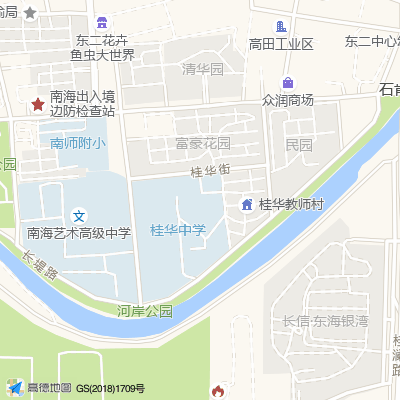

In [157]:
map(location=桂华_location,zoom=15)

### 思考

* 用户能够将高德地图以图片形式嵌入自己的网页中，且可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，计算机视觉功能、数据可视化功能的实现，让我认为它是含有ML、AI的功能的。

## 坐标转换

In [8]:
def assistant(locations:str,coordsys:str):
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params = {
        'key':key,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get(url, params)
    data = response.json()['locations']
    return data
assistant("113.088310,23.224014|113.087243,23.224571",'gps') # 腾讯地图经纬度

'113.093808322483,23.221550564237;113.09274061415,23.222107204862'

### 思考

* 坐标转换只是简单地将用户输入的非高德坐标转换成高德坐标，并未进行有关“智能”“算法”方面的功能，所以我认为，它是没有含有ML、AI的功能的。

## 天气查询

In [7]:
def weather(city:str):
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params = {
        'key':key,
        'city':city,
        'output':'json'
    }
    response = requests.get(url, params)
    data = response.json()
    return data
weather('佛山')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '佛山市',
   'adcode': '440600',
   'weather': '雨',
   'temperature': '16',
   'winddirection': '北',
   'windpower': '≤3',
   'humidity': '96',
   'reporttime': '2020-04-23 06:52:32'}]}

### 思考

* 天气查询功能的实现，首先是要定位，这是需要“算法”来实现的，根据这个定位再来查询目标区域当前/未来的天气情况。所以我认为，它是含有ML、AI的功能的。

## 输入提示

In [10]:
def inputtips(keywords:str):
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params = {
        'key':key,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get(url, params)
    data = response.json()
    return data
inputtips('南海区')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B02F5076FR',
   'name': '南海区人民法院',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': '113.142171,23.056686',
   'address': '桂城海五路',
   'typecode': '130503',
   'city': []},
  {'id': [],
   'name': '里水镇',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': [],
   'address': [],
   'typecode': '190106',
   'city': []},
  {'id': 'B0FFJ5A073',
   'name': '南海区',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': '113.143400,23.028941',
   'address': [],
   'typecode': '190105',
   'city': []},
  {'id': 'B02F5041ZH',
   'name': '南海区行政服务中心',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': '113.146714,23.027433',
   'address': '南新三路24号',
   'typecode': '130104',
   'city': []},
  {'id': 'B02F5076KG',
   'name': '广东省佛山市南海区妇幼保健院',
   'district': '广东省佛山市南海区',
   'adcode': '440605',
   'location': '113.159059,23.031625',
   'address': '桂平西路6号',
   't

### 思考

* 输入提示这个功能是：提供根据用户输入的关键词查询返回建议列表。我认为，这只是简单地从已有的数据库中调出含有目标关键词的相关信息，并不具有机器学习、人工智能的特性，所以它是没有含有ML、AI的功能的。

## 交通态势

In [38]:
def rectangle(rectangle:str):
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params = {
        'key':key,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get(url, params)
    data = response.json()
    return data
rectangle('113.150648,23.022201;113.175893,23.0244709')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '佛山一环高速：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 思考

* 交通态势是提供根据用户输入的内容能够返回希望查询的交通态势情况。将所在地区的坐标通过推荐算法来连接专门储存实时路况的数据库，再把相关数据返回给用户，所以我认为它是含有ML、AI的功能的。

## 地理围栏

In [4]:
def geoservice(name="测试围栏名称",center="113.153755,23.036377",radius=None,enable=None,valid_time=None,repeat=None,time=None,desc= "测试围栏描述",alert_condition=None)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key='
    params = {
        "key":key,
    }
    body = {
             "name": "测试围栏名称",
             "center": "113.153755,23.036377",
             "radius": "1000",
             "enable": "true",
             "valid_time": "2020-06-08",
             "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
             "time": "00:00,12:00;14:00,22:00",
             "desc": "测试围栏描述",
             "alert_condition": "enter;leave"
    }
    response = requests.post(url+key,params=params,json=body)
    data = response.json()
    return data
地理围栏=geoservice(center="113.153755,23.036377") # 万科
地理围栏

{'data': {'gid': '6ef435c7-0816-4e55-9e24-0d81c072c4cf',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考

* 地理围栏就是用一个虚拟的栅栏围出一个虚拟地理边界。签到打卡类场景、共享单车类场景、线下门店促销场景均使用到这项技术，这项技术需要运用各种算法来计算使用者是否在某一特定的地理位置或区域内，我认为它是机器“智能”的体现，所以我认为它是含有ML、AI的功能的。

## 轨迹纠偏

In [5]:
def guiji(x=None,y=None,sp=None,ag=None,tm=None)->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving'
    params = {
        "key":key,
    }
    body = [{
        "x": 116.449429,
        "y": 40.014844,
        "sp": 4,
        "ag": 110,
        "tm": 1478831753
        }, {
        "x": 116.449639,
        "y": 40.014776,
        "sp": 3,
        "ag": 110,
        "tm": 23
        }, {
        "x": 116.449859,
        "y": 40.014716,
        "sp": 3,
        "ag": 111,
        "tm": 33
        }, {
        "x": 116.450074,
        "y": 40.014658,
        "sp": 3,
        "ag": 110,
        "tm": 31
        }, {
        "x": 116.450273,
        "y": 40.014598,
        "sp": 3,
        "ag": 111,
        "tm": 20
        }]
    response = requests.post(url,params=params,json=body)
    data = response.json()
    return data
轨迹纠偏 = guiji(x="113.153755",y="23.036377",sp="3",ag="110",tm="28")
轨迹纠偏

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考

* 轨迹纠偏根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。我认为这是需要各种算法来实现的，所以我认为它含有ML、AI的功能。

## 批量请求

In [38]:
def back(url="/v3/place/around?offset=10&page=1&key=a46d66d89629ca9fc036964bcedf5d98&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"):  
    
    params={
        "key":key,
    }
    
    body = {
      "ops": [
        {
            "url": url
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=a46d66d89629ca9fc036964bcedf5d98&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
        ]
    }
    response = requests.get("https://restapi.amap.com/v3/batch?",params=params,json=body)
    data = response.json()
    return data
    
back()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '876',
   'pois': [{'typecode': '080000',
     'adname': '曹妃甸区',
     'biz_type': {},
     'id': 'B0FFIT4V37',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '118.509300,39.261324',
     'distance': '1935',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '昌丰路与昌盛街交叉口东150米',
     'poiweight': {},
     'cityname': '唐山市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '利民老年公寓',
     'childtype': {}},
    {'typecode': '080500',
     'adname': '曹妃甸区',
     'biz_type': {},
     'id': 'B0FFM1WN4Q',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '118.473800,39.284305',
     'distance': '2684',
     'tel': '13102692203;15032998415',
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永丰路与建设大

### 思考

* 批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合，由于批量请求没有用到各种算法，所以我认为它并没有含有ML、AI的功能。

# 设计一个简单的应用

简单介绍：可以根据用户当时使用的心情来自动改变地图导航画面的主题风格和推荐路线的地图app

功能：
* 用户心情不好，自动规划比较畅通、不太拥挤的路线（交通态势、路径规划）
* 给用户提供一个符合使用时心情的主题风格的实时地图（静态地图）
* 根据用户的心情，推荐附近的所有符合用户用餐的主题餐厅（搜索POI）